## Leitura de imagens não usadas no treinamento para teste de resultado

#### Validação Multiclasse


In [13]:
import torch
from transformers import ViTForImageClassification
import pytorch_lightning as pl
import torch.nn as nn

import sys
import os

dir_raiz = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(dir_raiz)
from classes.modelo import Modelo
from classes.modelo_custom import ModeloCustom

In [14]:
num_classes = 5
learning_rate = 0.0001

### Load Modelo Completo

In [3]:
# Instancie o modelo
# model = ModeloCustom(num_classes, learning_rate)
model = Modelo(num_classes, learning_rate)

# Carregue o estado do modelo salvo
model.load_state_dict(torch.load('./resultados/google-224-model/normal/google-vit-16-224-BASE-60-x-Balanceado-SEMNEGATIVO-lr00001-wd0001/modelo_vit_gpu.pth', map_location="cpu"))
model.eval() 

d:\AREA_DE_TRABALHO\Faculdade_8_Periodo\TCC\VIT-cric\vit-dynamic-patches\env\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

Modelo(
  (model): ViTForImageClassification(
    (vit): ViTModel(
      (embeddings): ViTEmbeddings(
        (patch_embeddings): ViTPatchEmbeddings(
          (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        )
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (encoder): ViTEncoder(
        (layer): ModuleList(
          (0-11): 12 x ViTLayer(
            (attention): ViTAttention(
              (attention): ViTSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
              (output): ViTSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
            (intermed

### Load Checkpoint

In [15]:
model = Modelo.load_from_checkpoint("resultados/google-224-model/normal/google-vit-16-224-BASE-60-x-Balanceado-SEMNEGATIVO-lr00001-wd0001/epoch=30-val_loss=0.07-val_accuracy=0.99.ckpt")
print(model.learning_rate)

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [16]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch
import os

def get_key_from_value(dicte, target_value):
    for key, value in dicte.items():
        if value == target_value:
            return key
    return None

def avaliarModelo(path_paste):
  all_files_and_dirs = os.listdir(path_paste)

  # Filtra apenas os arquivos
  files = [f for f in all_files_and_dirs if os.path.isfile(os.path.join(path_paste, f))]

  for i, file in enumerate(files):
    
    
    image_path = f"{path_paste}/{file}"
    image = Image.open(image_path).convert('RGB')

    # Transforme a imagem
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image_tensor = transform(image).unsqueeze(0)  # Adicione uma dimensão para o batch

    # Certifique-se de que o modelo está em modo de avaliação
    model.eval()

    with torch.no_grad():
      # Faça a previsão
      output = model(image_tensor)
      probabilities = torch.softmax(output, dim=1)
      prediction = torch.argmax(probabilities, dim=1).item()

    # Exibir a imagem
    plt.imshow(image)
    plt.axis('off')  # Não exibir os eixos
    
    
    # dicte = {'ASC-H': 0, 'ASC-US': 1, 'HSIL': 2, 'LSIL': 3, 'Negative for intraepithelial lesion': 4, 'SCC': 5}
    dicte = {'ASC-H': 0, 'ASC-US': 1, 'HSIL': 2, 'LSIL': 3, 'SCC': 4}
    
    retorno = get_key_from_value(dicte=dicte, target_value=prediction)
    
    plt.title(f'Predicted class: {retorno}')
    plt.show()
    
    if i == 15:
      break


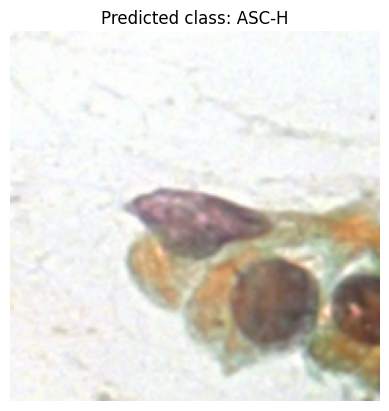

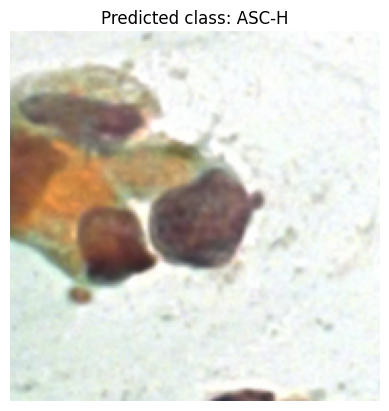

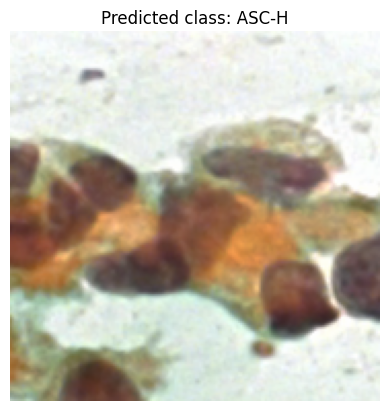

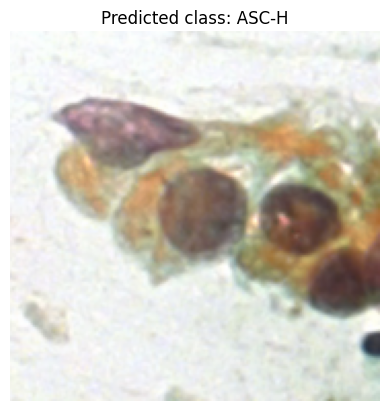

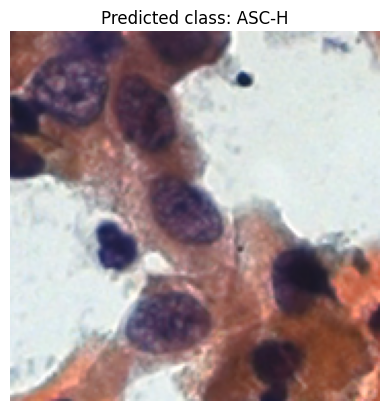

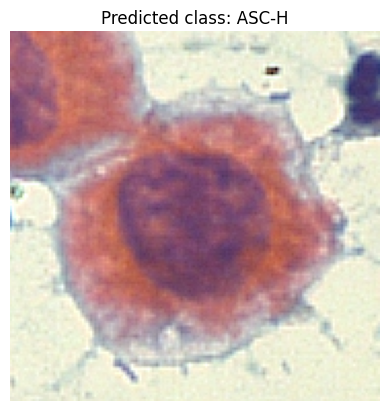

In [9]:
avaliarModelo("data/base_treinamento/test/ASC-H")

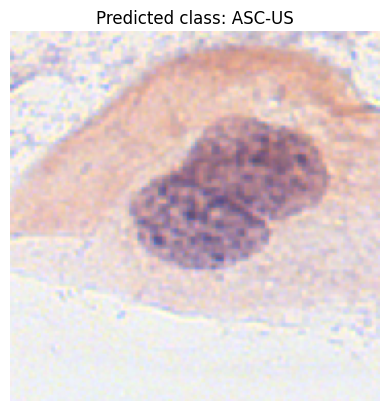

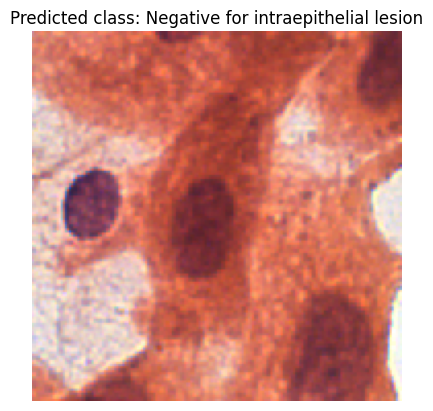

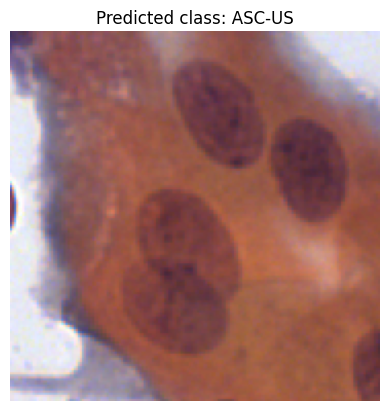

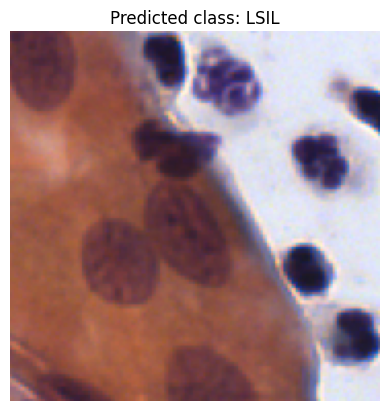

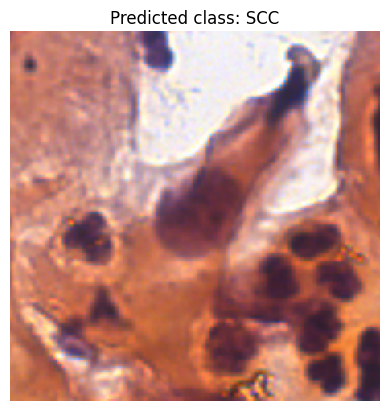

In [10]:
avaliarModelo("data/base_treinamento/validation/ASC-US")

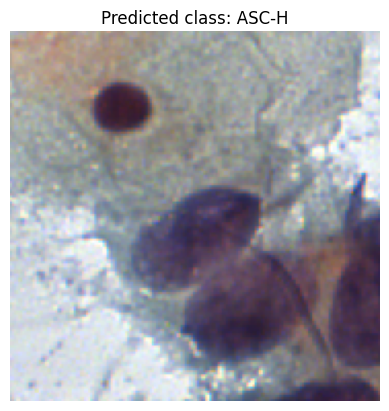

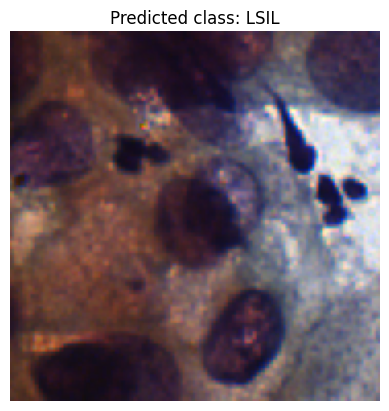

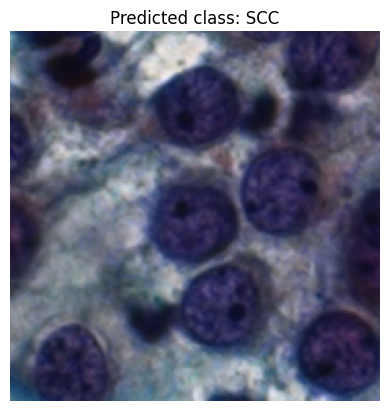

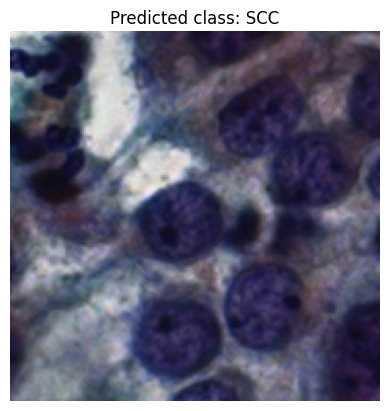

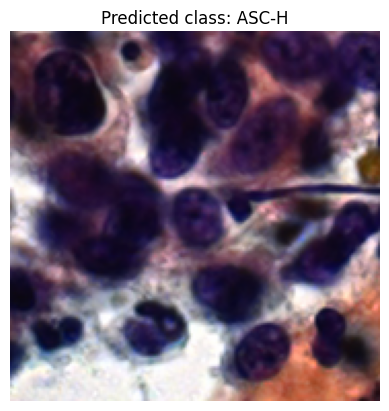

In [11]:
avaliarModelo("data/base_treinamento/validation/HSIL")

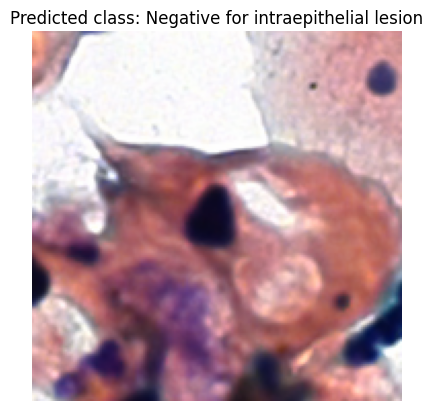

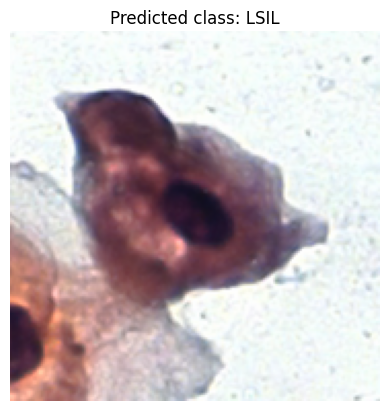

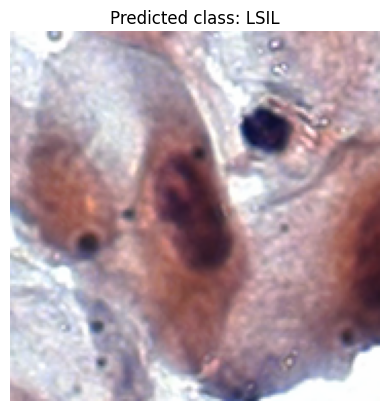

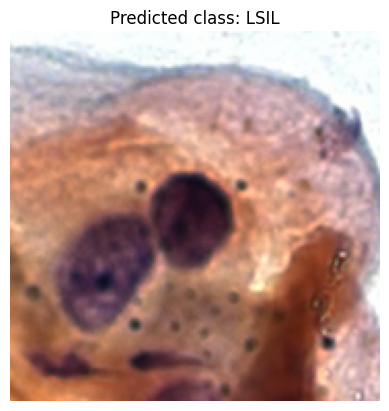

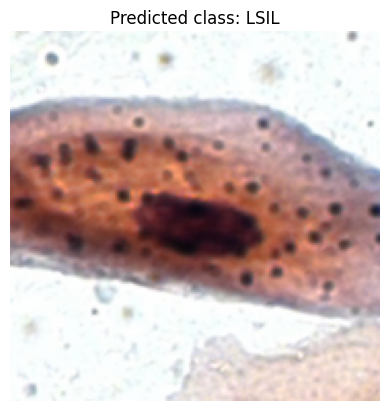

In [12]:
avaliarModelo("data/base_treinamento/validation/LSIL")

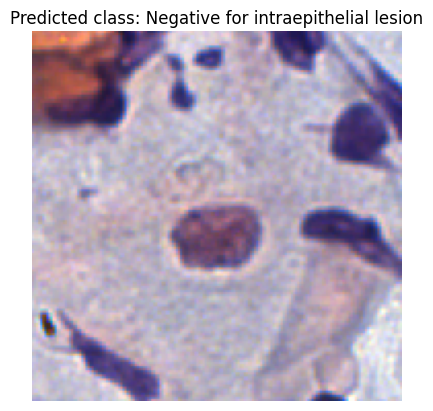

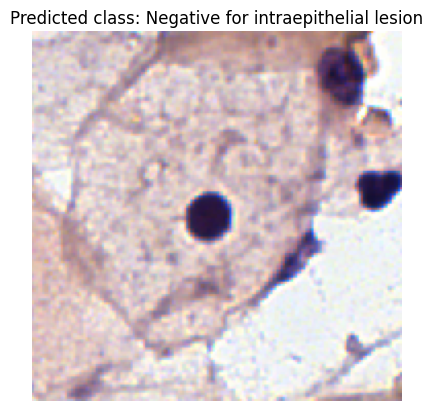

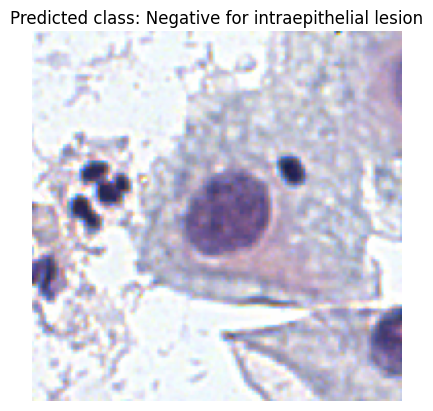

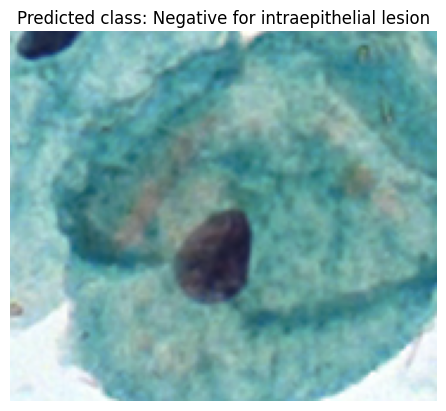

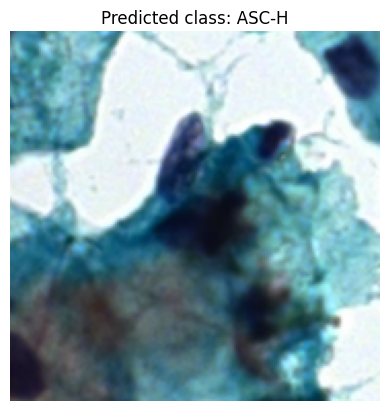

In [13]:
avaliarModelo("data/base_treinamento/validation/Negative for intraepithelial lesion")

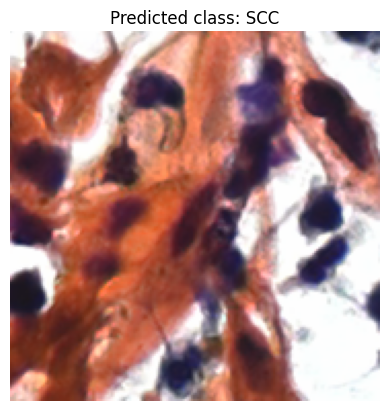

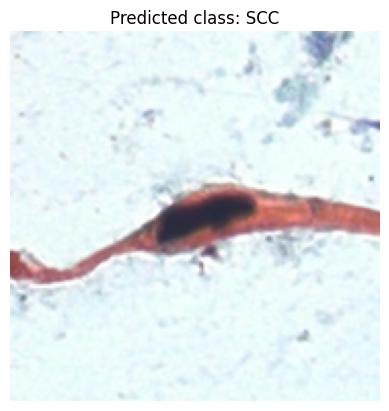

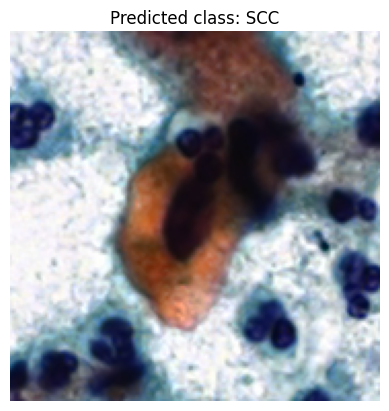

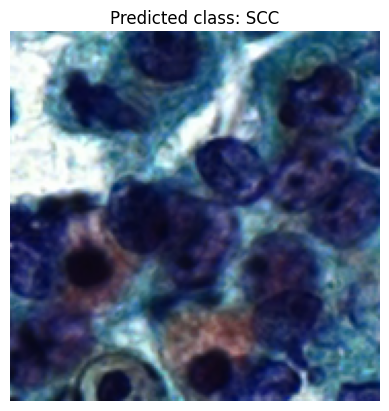

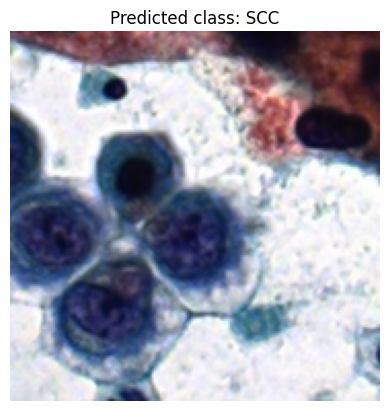

In [14]:
avaliarModelo("data/base_treinamento/validation/SCC")

### Avaliar pelo conjunto de Teste


In [18]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch
import os

def get_key_from_value(dicte, target_value):
    for key, value in dicte.items():
        if value == target_value:
            return key
    return None

def avaliarModeloNumero(path_paste, resposta):
  all_files_and_dirs = os.listdir(path_paste)

  # Filtra apenas os arquivos
  files = [f for f in all_files_and_dirs if os.path.isfile(os.path.join(path_paste, f))]

  qtd_total = len(files)
  
  contador_certo = 0
  
  for i, file in enumerate(files):
        
    image_path = f"{path_paste}/{file}"
    image = Image.open(image_path).convert('RGB')

    # Transforme a imagem
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    image_tensor = transform(image).unsqueeze(0)  # Adicione uma dimensão para o batch

    # Certifique-se de que o modelo está em modo de avaliação
    model.eval()

    with torch.no_grad():
      # Faça a previsão
      output = model(image_tensor)
      probabilities = torch.softmax(output, dim=1)
      prediction = torch.argmax(probabilities, dim=1).item()

    
    # dicte = {'ASC -H': 0, 'ASC-US': 1, 'HSIL': 2, 'LSIL': 3, 'Negative for intraepithelial lesion': 4, 'SCC': 5}
    dicte = {'ASC-H': 0, 'ASC-US': 1, 'HSIL': 2, 'LSIL': 3, 'SCC': 4}
    
    retorno = get_key_from_value(dicte=dicte, target_value=prediction)
    
    if retorno == resposta:
      contador_certo += 1
      
  return f'{contador_certo}/{qtd_total}'
    
  

In [19]:
avaliarModeloNumero("data/base_treinamento/test/ASC-H", "ASC-H")

'68/68'

In [20]:
avaliarModeloNumero("data/base_treinamento/test/ASC-US", "ASC-US")

'84/86'

In [21]:
avaliarModeloNumero("data/base_treinamento/test/HSIL", "HSIL")

'236/237'

In [22]:
avaliarModeloNumero("data/base_treinamento/test/LSIL", "LSIL")

'135/137'

In [ ]:
avaliarModeloNumero("data/base_treinamento/test/Negative for intraepithelial lesion", "Negative for intraepithelial lesion")

In [23]:
avaliarModeloNumero("data/base_treinamento/test/SCC", "SCC")

'27/28'